

# Project: Investigate The Movie Database 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>**DataSet Description:**
>> This data-set contains information about 10,000 movies collected from The Movie Database (TMDb), including genres , cast , user-ratings ,revenue.

>**Questions to be answered through the project:**
>> 1. Which genres are most popular from year to year?                                                                 
>> 2. What kinds of properties are associated with movies that have high revenues?                                                                  
>> 3. What is the director name who has the most top yearly-voting rate over all years?
>> 4. which month mostly has the highest movies number released for last 10 years ? 
>> 5. which genres have the highest mean revenues over the last 10 years ?

In [1]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling




   **Loading our dataset and Looking into first 4-lines in our dataset**

In [2]:
df_org = pd.read_csv('tmdb-movies.csv')

In [3]:
df_org.head(4)

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   

                         tagline  ...  \
0              The park is open.  ...   
1             What a Lovely Day.  ...   
2     One Choice Can Destroy You  ...   
3  Every generation has a story.  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  

[4 rows x 21 columns]

We can observe that we have **21 columns**. Also, we can see that certain columns contain multiple values separated by pipe (|) characters like **‘cast’** and **‘genres’** and **'director'** and **'production_companies'**







**Exploring more information about our dataset like:** 

>dataset shape:num of cloumns and num of rows , datatype of each feature(column), Null Count if exist (missing) in each coloumn.


In [4]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

 - our dataset shape is (21 columns ,10866 rows)
 - we have null/missing data in columns ('cast' , 'homepage' , 'director' ,'tagline','keywords','overview','genres', 'production_companies').
 - 'release_year' datatype is an object not a datetime format

### Data Cleaning:
- Dropping the non important cloumns which will not be used in analysis during our project or duplicate meaning columns.
- Check and dropping duplicated Data entries.
- Converting dtype of 'release_date' to datetime.
- exploring columns' numeric data distributions for any abnormal/ un reasonable values.



**Dropping the non important cloumns which will not be use in analysis during our project or duplicate meaning columns**

In [5]:
#dropping the non important cloumns which will not be use in analysis during our project 
df = df_org.copy().drop(columns=['imdb_id','homepage','tagline','keywords','overview'])
#dropping the duplicate-meaning columns
df.drop(columns=['budget','revenue'],inplace=True)
df.head(3)

id  popularity      original_title  \
0  135397   32.985763      Jurassic World   
1   76341   28.419936  Mad Max: Fury Road   
2  262500   13.112507           Insurgent   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   

   runtime                                     genres  \
0      124  Action|Adventure|Science Fiction|Thriller   
1      120  Action|Adventure|Science Fiction|Thriller   
2      119         Adventure|Science Fiction|Thriller   

                                production_companies release_date  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15        5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15        6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15        2480   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08

**Check and dropping duplicated Data entries.**

In [6]:
#check duplicated Data entries
df[df.duplicated()]

id  popularity original_title  \
2090  42194     0.59643         TEKKEN   

                                                   cast          director  \
2090  Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...  Dwight H. Little   

      runtime                                       genres  \
2090       92  Crime|Drama|Action|Thriller|Science Fiction   

        production_companies release_date  vote_count  vote_average  \
2090  Namco|Light Song Films      3/20/10         110           5.0   

      release_year  budget_adj  revenue_adj  
2090          2010  30000000.0     967000.0

1 row found to be duplicated that need to be removed

In [7]:
# reomoving duplicate entries
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

0

**Dealing with/Fixing null values**

In [9]:
df.isnull().sum()

id                         0
popularity                 0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

 - we have huge number of null enteries for **'production_companies'** , we can drop 'production_companies'  Column.
 - we have few number of null enteries for **'genres' ,'director' and 'cast'** , we can drop rows of these null enteries.

In [10]:
df.drop(columns=['production_companies'],inplace=True)
df.dropna(inplace=True)

In [11]:
(df.isnull().sum()>0).any()

False

**Converting dtype of 'release_date' to datetime**
    

In [12]:
df['release_date'] = df.apply(lambda x: x['release_date'][:-2]+ str(x['release_year']), axis=1 )
df['release_date'] = pd.to_datetime(df['release_date'])

In [13]:
df['release_date'].head()


0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

**exploring columns numeric data distributions**

In [14]:
# exploring columns numeric data distributions
df.describe()

id    popularity       runtime    vote_count  vote_average  \
count   10731.000000  10731.000000  10731.000000  10731.000000  10731.000000   
mean    65201.741869      0.652615    102.468829    219.812972      5.964710   
std     91470.508056      1.004804     30.493873    578.815324      0.930283   
min         5.000000      0.000188      0.000000     10.000000      1.500000   
25%     10547.500000      0.210765     90.000000     17.000000      5.400000   
50%     20323.000000      0.387081     99.000000     39.000000      6.000000   
75%     73948.500000      0.720889    112.000000    148.000000      6.600000   
max    417859.000000     32.985763    900.000000   9767.000000      9.200000   

       release_year    budget_adj   revenue_adj  
count  10731.000000  1.073100e+04  1.073100e+04  
mean    2001.259622  1.776530e+07  5.200623e+07  
std       12.820151  3.446630e+07  1.454252e+08  
min     1960.000000  0.000000e+00  0.000000e+00  
25%     1995.000000  0.000000e+00  0.000000e+00  
50%     2006.000000  0.000000e+00  0.000000e+00  
75%     2011.000000  2.110885e+07  3.470546e+07  
max     2015.000000  4.250000e+08  2.827124e+09

>From above table and printed stats we can observe that we have zero values(unreasonable values) in columns **runtime ,budget_adj and revenue_adj** which need to be modified/estimated.

In [15]:
print('num of rows with zero value in revenue_adj :' , len(df[df['revenue_adj']==0]))
print('num of rows with zero value in budget_adj :' , len(df[df['budget_adj']==0]))
print('num of rows with zero value in runtime :' , len(df[df['runtime']==0]))

num of rows with zero value in revenue_adj : 5888
num of rows with zero value in budget_adj : 5578
num of rows with zero value in runtime : 28


**Modifying/estimating zero values(unreasonable values) in columns runtime ,budget_adj and revenue_adj**

In [16]:
#creating our estimated values based on movies generes 
df_fill = df[['genres','revenue_adj','budget_adj','runtime']]
df_fill = df_fill.groupby(['genres']).agg({'revenue_adj':"mean",'budget_adj': "mean" ,'runtime':"mean" })
#df_fill    # our reference data frame to fill zero values for revenue_adj , budget_adj , runtime


modifying zero values in columns runtime ,budget_adj and revenue_adj based on our above reference DataFrame df_fill

In [17]:
# modifying zero values in columns runtime ,budget_adj and revenue_adj based on our reference DataFrame df_fill

df['revenue_adj'] = df[['genres','revenue_adj']].apply(lambda x: df_fill.loc[x[0]]['revenue_adj'] if x[1] == 0 else x[1]  , axis=1)
df['budget_adj'] = df[['genres','budget_adj']].apply(lambda x: df_fill.loc[x[0],'budget_adj'] if x[1] == 0 else x[1]  , axis=1)
df['runtime'] = df[['genres','runtime']].apply(lambda x: df_fill.loc[x[0]]['runtime'] if x[1] == 0 else x[1]  , axis=1)


In [18]:
print('num of rows with zero value in revenue_adj :' , len(df[df['revenue_adj']==0]))
print('num of rows with zero value in budget_adj :' , len(df[df['budget_adj']==0]))
print('num of rows with zero value in runtime :' , len(df[df['runtime']==0]))

num of rows with zero value in revenue_adj : 1093
num of rows with zero value in budget_adj : 959
num of rows with zero value in runtime : 3


we still having some zero values , will try to fill based on first genre item then second genre item in genres column for each entery

In [19]:
#fill based on first genre item then second genre item in genres column for each entery

for i in range(3): 
    df['revenue_adj'] = df[['genres','revenue_adj']].apply(lambda x: x[1] if x[1] != 0 
                         else (df_fill.loc[x[0].split('|')[i],'revenue_adj']  if '|' in x[0] and len(x[0].split('|')) > i else x[1])
                                                                 , axis=1)
    df['budget_adj'] = df[['genres','budget_adj']].apply(lambda x: x[1] if x[1] != 0 
                         else (df_fill.loc[x[0].split('|')[i],'budget_adj']  if '|' in x[0] and len(x[0].split('|')) > i else x[1])
                                                               , axis=1)
    df['runtime'] = df[['genres','runtime']].apply(lambda x: x[1] if x[1] != 0 
                         else (df_fill.loc[x[0].split('|')[i],'runtime']  if '|' in x[0] and len(x[0].split('|')) > i else x[1])  
                                                   , axis=1)

In [20]:
print('num of rows with zero value in revenue_adj :' , len(df[df['revenue_adj']==0]))
print('num of rows with zero value in budget_adj :' , len(df[df['budget_adj']==0]))
print('num of rows with zero value in runtime :' , len(df[df['runtime']==0]))

num of rows with zero value in revenue_adj : 7
num of rows with zero value in budget_adj : 22
num of rows with zero value in runtime : 0


Remaining enteries with zero values are few, we can drop those rows from our dataframe

In [21]:
#remaining enteries are few we can drop them from our dataframe
df = df[(df['budget_adj'] > 0)&(df['revenue_adj'] > 0)]


In [22]:
df.describe()

id    popularity       runtime    vote_count  vote_average  \
count   10706.00000  10706.000000  10706.000000  10706.000000  10706.000000   
mean    65050.87521      0.653489    102.721069    220.281898      5.964665   
std     91330.35913      1.005750     30.077350    579.408847      0.930323   
min         5.00000      0.000188      3.000000     10.000000      1.500000   
25%     10539.25000      0.210884     90.000000     17.000000      5.400000   
50%     20272.50000      0.387532     99.000000     39.000000      6.000000   
75%     73918.00000      0.722312    112.000000    149.000000      6.600000   
max    417859.00000     32.985763    900.000000   9767.000000      9.200000   

       release_year    budget_adj   revenue_adj  
count  10706.000000  1.070600e+04  1.070600e+04  
mean    2001.250420  2.481173e+07  7.321110e+07  
std       12.821294  3.254047e+07  1.436053e+08  
min     1960.000000  9.210911e-01  1.481691e+00  
25%     1995.000000  7.434777e+06  1.413047e+07  
50%     2006.000000  1.269994e+07  3.184637e+07  
75%     2011.000000  2.878621e+07  6.509472e+07  
max     2015.000000  4.250000e+08  2.827124e+09

Now , Zero values in columns runtime ,budget_adj and revenue_adj has been modified based on our above reference DataFrame **df_fill** .

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10706 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10706 non-null  int64         
 1   popularity      10706 non-null  float64       
 2   original_title  10706 non-null  object        
 3   cast            10706 non-null  object        
 4   director        10706 non-null  object        
 5   runtime         10706 non-null  float64       
 6   genres          10706 non-null  object        
 7   release_date    10706 non-null  datetime64[ns]
 8   vote_count      10706 non-null  int64         
 9   vote_average    10706 non-null  float64       
 10  release_year    10706 non-null  int64         
 11  budget_adj      10706 non-null  float64       
 12  revenue_adj     10706 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(3), object(4)
memory usage: 1.1+ MB


**Now our data is cleaned and ready for exploratory Data Analysis**

<a id='eda'></a>
## Exploratory Data Analysis




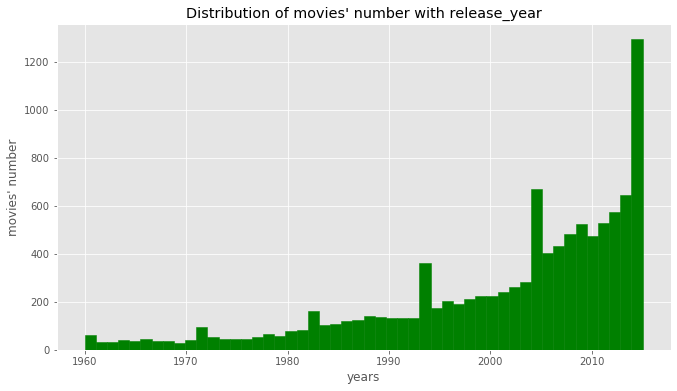

In [24]:
plt.style.use('ggplot')
df['release_year'].hist(figsize=(11,6), bins=50 , Color= 'green');
plt.title("Distribution of movies' number with release_year")
plt.xlabel('years')
# plt.xlim(1960,2015)
plt.ylabel("movies' number");

- Year 2015 has the highest number of movies released.
- number of yearly released movies increase year by year.


In [25]:
df['runtime'].hist(figsize=(11,6), bins=50 , Color= 'red' );
plt.title("Distribution of movies' runtime")
plt.xlabel('runtime(min)')
plt.ylabel("movies' number");
plt.xlim(0,300)

(0, 300)

 - most of movies duration (mean) is around 1.36 hour (100 mins)
 - distribution of movies' runtime is normally distributed.

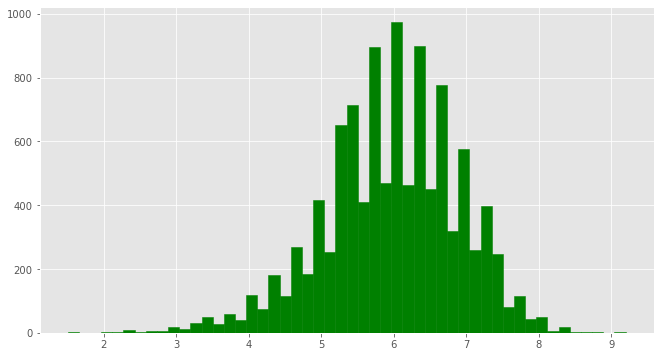

In [26]:
df['vote_average'].hist(figsize=(11,6), bins=50 , Color= 'green');


 - distribution of movies' vote rate is slightly left skewed.
 - most of movies' vote rate is around 6.

## Exploring relation between different movies properties 

In [27]:

fig, axes = plt.subplots(1,2, figsize=(13, 5))

axes[0].scatter(x = df['revenue_adj'], y = df['vote_count']);
axes[0].set_xlabel('revenue_adj' ,c='black')
axes[0].set_ylabel('vote_count' ,c='black')
axes[0].set_title('Revenue_adj Vs Vote_count');

axes[1].scatter(x = df['revenue_adj'], y = df['budget_adj']);
axes[1].set_xlabel('revenue_adj' ,c='black')
axes[1].set_ylabel('budget_adj' ,c='black')
axes[1].set_title('Revenue_adj Vs budget_adj');

plt.tight_layout();

Above graph that 'revenue_adj' of a movie has a **positive relation with Vote count ,budget of movie**.

In [28]:
plt.figure(figsize=(8,4))
sns.heatmap(df[['revenue_adj','budget_adj','vote_count']].corr(),annot=True)
plt.title('Correlation between revenue_adj Vs. budget_adj and vote_count')
plt.tight_layout();

### Question 1: What kinds of properties are associated with movies that have high revenues?


> Above Correlation heatmap graph that 'revenue_adj' of a movie has a **positive relation/correlation with Vote count ,budget of movie**

### Question 2 Which genres are most popular from year to year?

In [29]:
# items_extractList function to split mixed items by '|' in a column into a list sothat it will be easy to explode later

def items_extractList(complex_items):
    items_lst =[]
    
    if '|' in str(complex_items):
        items_lst += complex_items.split('|')
    else:
        items_lst.append(complex_items)
 
    return items_lst

In [30]:
# using items_extractList function to split mixed items in generes into a list sothat it will be easy to explode later

df['genres'] = df['genres'].apply(items_extractList)


In [31]:
# creating data frame for release_year, Popularity and generes
df_mostPopular = df[['release_year','genres','popularity']]

df_mostPopular = df_mostPopular.explode('genres')


In [32]:
#filtering the mostPopular generes every year by grouping [release_year and generes] then aggregration by average of Popularity 

df_mostPopular_mean = df_mostPopular.groupby(['release_year','genres']).mean()
df_mostPopular_mean = df_mostPopular_mean.reset_index()

#sorting generes by highest Popularity values
df_mostPopular_mean = df_mostPopular_mean.sort_values(by='popularity',ascending = False ,ignore_index=True)

In [33]:
df_mostPopular_mean.head()

release_year     genres  popularity
0          2015  Adventure    3.283786
1          2015    Western    3.178796
2          1961  Animation    2.631987
3          1967  Animation    2.550704
4          2014  Adventure    2.430526

In [34]:
# dropping duplicate rows based on 'release_year' Values
df_mostPopular_mean = df_mostPopular_mean.drop_duplicates(subset='release_year' , keep='first')
df_mostPopular_mean = df_mostPopular_mean.sort_values(by='release_year',ascending = False ,ignore_index=True)
df_mostPopular_mean.head(10)

release_year     genres  popularity
0          2015  Adventure    3.283786
1          2014  Adventure    2.430526
2          2013  Adventure    1.294491
3          2012    Western    1.732778
4          2011    Western    1.175800
5          2010  Adventure    1.378913
6          2009  Adventure    1.153656
7          2008  Adventure    1.008385
8          2007    Fantasy    0.957349
9          2006    Fantasy    1.023134

In [35]:


df_mostPopular_mean['genres'].value_counts().plot.bar(figsize=(10,5));
plt.xlabel('genres' ,c='black')
plt.ylabel('num of years with highest popularity' ,c='black')
plt.title('Most popular genres for all years(1960-2015)');

### Question 2 Which genres are most popular from year to year?
> we can observe from above graph that the top 4 popular genres are [**'Adventure' ,'Animation','Fantasy', 'Crime'**]

### Question 3 : What is the director name who has the most top yearly-voting rate over all years?

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10706 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10706 non-null  int64         
 1   popularity      10706 non-null  float64       
 2   original_title  10706 non-null  object        
 3   cast            10706 non-null  object        
 4   director        10706 non-null  object        
 5   runtime         10706 non-null  float64       
 6   genres          10706 non-null  object        
 7   release_date    10706 non-null  datetime64[ns]
 8   vote_count      10706 non-null  int64         
 9   vote_average    10706 non-null  float64       
 10  release_year    10706 non-null  int64         
 11  budget_adj      10706 non-null  float64       
 12  revenue_adj     10706 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(3), object(4)
memory usage: 1.1+ MB


In [37]:
df['director'].str.contains('|').value_counts()

True    10706
Name: director, dtype: int64

In [38]:
df_direct_mostvoterate = df[['release_year','director','original_title','vote_average']]

In [39]:
#filtering the highest vote-rated movie's directory name yearly by grouping [release_year and director] then aggregration by max of vote_average 

df_direct_mostvoterate = df_direct_mostvoterate.groupby(['release_year']).max()
df_direct_mostvoterate = df_direct_mostvoterate.reset_index()

df_direct_mostvoterate.head()


release_year                                           director  \
0          1960                                         Wolf Rilla   
1          1961                                     Yuri Chulyukin   
2          1962  Vittorio De Sica|Federico Fellini|Luchino Visc...   
3          1963                                Wolfgang Reitherman   
4          1964                        Ubaldo Ragona|Sidney Salkow   

                     original_title  vote_average  
0             Village of the Damned           8.0  
1                   West Side Story           7.5  
2  What Ever Happened to Baby Jane?           7.7  
3    X: The Man with the X-Ray Eyes           7.5  
4                              Zulu           7.7

In [40]:
# using items_extractList function to split mixed items in director into a list sothat it will be easy to explode later

df_direct_mostvoterate['director'] = df_direct_mostvoterate['director'].apply(items_extractList)
df_direct_mostvoterate = df_direct_mostvoterate.explode('director')

In [41]:
df_direct_mostvoterate.head()

release_year          director                    original_title  \
0          1960        Wolf Rilla             Village of the Damned   
1          1961    Yuri Chulyukin                   West Side Story   
2          1962  Vittorio De Sica  What Ever Happened to Baby Jane?   
2          1962  Federico Fellini  What Ever Happened to Baby Jane?   
2          1962  Luchino Visconti  What Ever Happened to Baby Jane?   

   vote_average  
0           8.0  
1           7.5  
2           7.7  
2           7.7  
2           7.7

In [42]:
woody = df_direct_mostvoterate[df_direct_mostvoterate['director']== 'Woody Allen']
len(df_direct_mostvoterate[df_direct_mostvoterate['director']== 'Woody Allen'])

22

In [43]:
df_direct_mostvoterate['director'].value_counts().plot.bar(figsize=(10,5));
plt.xlabel('Director_Name' ,c='black')
plt.ylabel('num of years with top rated movie' ,c='black')
plt.title('The most Top movies-rates directors over the years(1960-2015)');
plt.tight_layout();

### Question 3 : What is the director name who has the most top yearly-voting rate over all years?
>we can observe from above graph that the most top movies-rated Director over the years is [**Woody Allen**]

#### Question 4 : which months mostly have the highest movies number released for last 10 years ?

In [44]:
# extract month value from release_date column and create new column 'month'
df['month'] = df['release_date'].apply(lambda x: x.strftime('%B'))

# filter on last 10 years and get counts of movies per month
df_top_month = df[df['release_year']> 2005]['month'].value_counts()



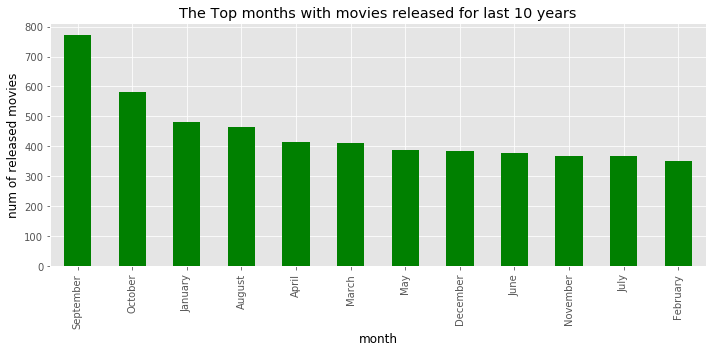

In [45]:
#plotting The Top months with movies released for last 10 years

df_top_month.plot.bar(figsize=(10,5),color='green');
plt.xlabel('month' ,c='black')
plt.ylabel('num of released movies' ,c='black')
plt.title('The Top months with movies released for last 10 years');
plt.tight_layout();

### Question 4 : which months mostly have the highest movies number released for last 10 years ?
>we can observe from above graph that The Top months with the highest movies released for last 10 years are [**September**] then [**October**]

### Question 5 : which genres have the highest mean revenues over the last 10 years ?


In [46]:

df_highrevenue = df[df['release_year']> 2005][['release_year','genres','revenue_adj','budget_adj']]
df_highrevenue = df_highrevenue.explode('genres')
df_highrevenue.head()


release_year           genres   revenue_adj    budget_adj
0          2015           Action  1.392446e+09  1.379999e+08
0          2015        Adventure  1.392446e+09  1.379999e+08
0          2015  Science Fiction  1.392446e+09  1.379999e+08
0          2015         Thriller  1.392446e+09  1.379999e+08
1          2015           Action  3.481613e+08  1.379999e+08

In [47]:
df_highrevenue = df_highrevenue.groupby(['genres']).agg(
    {         'revenue_adj':"mean",    # mean revenue_adj per genre
         'budget_adj': "mean",  # mean budget_adj per genre
    })
df_highrevenue.head()

revenue_adj    budget_adj
genres                               
Action     1.193001e+08  4.188669e+07
Adventure  1.946445e+08  6.267154e+07
Animation  1.330612e+08  4.151244e+07
Comedy     6.174060e+07  2.144536e+07
Crime      6.228957e+07  2.536133e+07

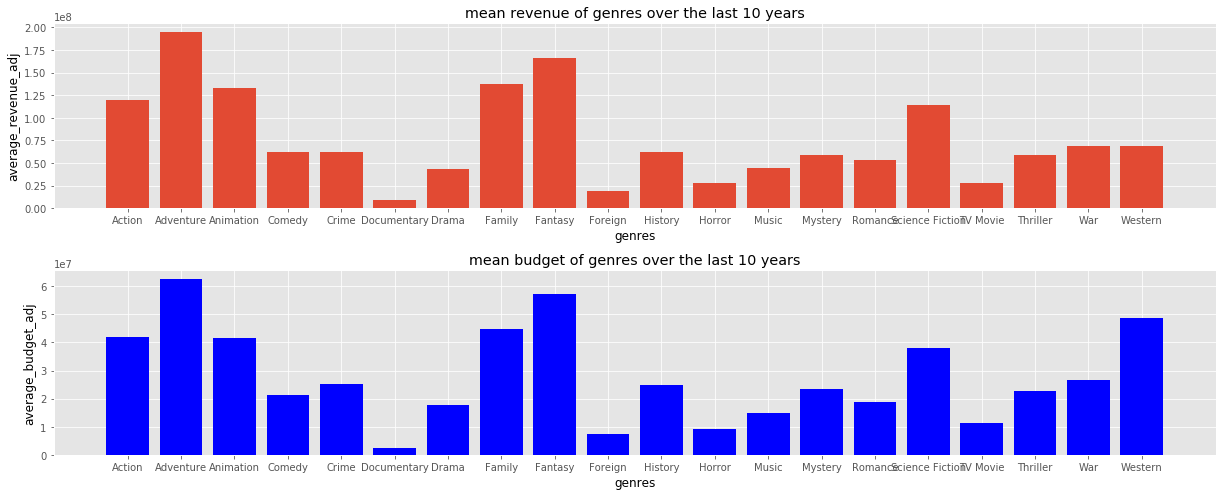

In [48]:
fig, axes = plt.subplots(2,1, figsize=(17, 7))

axes[0].bar(x = df_highrevenue.index, height = df_highrevenue['revenue_adj']);
axes[0].set_xlabel('genres' ,c='black')
axes[0].set_ylabel('average_revenue_adj' ,c='black')
axes[0].set_title('mean revenue of genres over the last 10 years');

axes[1].bar(x = df_highrevenue.index, height = df_highrevenue['budget_adj'],color='blue');
axes[1].set_xlabel('genres' ,c='black')
axes[1].set_ylabel('average_budget_adj' ,c='black')
axes[1].set_title('mean budget of genres over the last 10 years');

plt.tight_layout();

we can observe from above graph that top genre having the highest mean revenues over the last 10 years is **Adventure** then **Fantasy**.

In [49]:
df_highrevenue[df_highrevenue['revenue_adj'] == df_highrevenue['revenue_adj'].max()]

revenue_adj    budget_adj
genres                               
Adventure  1.946445e+08  6.267154e+07

### Question 5 : which genres have the highest mean revenues over the last 10 years ?
> we can observe from above graph that top genre having the highest mean revenues over the last 10 years is **Adventure** with mean revenue around **194.6 million dollars** then **Fantasy**.

<a id='conclusions'></a>
## Conclusions

> The top 4 popular Movies' genres are **'Adventure' ,'Animation','Fantasy', 'Crime'**.

> The Director whos movies have the most top movies-rated over the years is **Woody Allen**.

> The Top 2 months with the highest movies released [**Movies season**] for last 10 years are **September** then **October**.


> The movies with **high revenues** are associated with **high Votes count** and **the budgets of the movies**.

> the top genre having the highest mean revenues over the last 10 years is **Adventure** with mean revenue around **194.6 million dollars** then **Fantasy**.

- **Limitions:** we have below Limitions in Data set that may affect our data analysis:

>- we have null/missing data in columns ('cast' , 'director' ,'tagline','keywords','genres', 'production_companies').

>- we observed unreasonable zero values for budget & revenue & run time.
      - num of rows with zero value in revenue_adj : 5888
      - num of rows with zero value in budget_adj : 5578
      - num of rows with zero value in runtime : 28

